# Putting Sms Into Work

1. You need to analyse the sms data and answer the questions listed below.
2. You are free to use anything of your choice.
3. The data provided is highly sensitive so please don't share with anyone

In [ ]:
import json
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [ ]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install duckling==1.8.0
!pip install --force-reinstall JPype1==0.7.0

  Using cached JPype1-0.7.0-cp37-cp37m-manylinux2010_x86_64.whl (2.8 MB)
  Attempting uninstall: JPype1
    Found existing installation: JPype1 0.7.0
    Uninstalling JPype1-0.7.0:
      Successfully uninstalled JPype1-0.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from duckling import DucklingWrapper, Duckling
d = DucklingWrapper()

In [ ]:
data = pd.read_json("/content/drive/MyDrive/Colab Notebooks/G90/data_small.json")

In [ ]:
data.shape

(1898953, 8)

In [ ]:
# Listing down all the users id
data["user_id"].unique()

array(['40ec6ba2-af1b-4037-9e01-3d108faa937b',
       'e1eb6177-cf74-4727-b1c5-370d6c1a5fd1',
       '301ff388-c5ae-4dff-b6f5-83103cbbb5d0',
       'e042e6b7-466a-4ba9-af43-90d3eb346ccc',
       '6a453330-9801-4208-b0e0-9bc8f3608ec4',
       '6f28bcf7-9e64-423b-8d7b-ea7c03f5f691',
       'c385fa59-8d9b-4f4e-9f41-ea3dc454b488',
       'feb6542d-b15e-4eac-b1a8-b68b2e8a3f58',
       '8f659f61-b21c-48ae-9a11-e73e0130a02f',
       'cce50213-e98e-4390-bdd5-c86323071760',
       'd526455c-b4e4-4807-b12c-29278a65fe55',
       '05748776-fe93-4f90-8a49-40f1cab76be6',
       '87865ed3-3b06-42fe-bf87-857feff5fb9a',
       'f5a33af3-2852-4ec2-8b8a-967cabbb7864',
       'fcadb10d-c4a8-407a-8c3a-9a11bc7ade75',
       '2f33a137-840d-4a61-8fa2-2b1036c6b4de',
       'c364cbfe-4232-4716-a5d7-11379520e5ba',
       'f1c22112-db6f-42aa-859a-de53c7b82e7b',
       '32f60934-a312-42da-a767-26242c5a236f',
       '940fd2e3-880c-4ec9-8c66-66f7cb25e6a6',
       '6894da3f-a76e-4152-b91e-3bc186107a39',
       '25d3f

In [ ]:
# msg of a given user id
user_msg = data[data["user_id"]=="da6d0664-7372-4a39-9b7e-4b3451f413f1"]

In [ ]:
user_msg.head()

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
880973,5230763,+919741840237,You have 1 missed call(s) from +919741840237 ....,2021-08-25 05:58:35.276,2021-09-18 14:25:09.078,da6d0664-7372-4a39-9b7e-4b3451f413f1,NaN,True
881520,5243623,+919790802750,Phone okke valicherinju pottichu njaan.. Athre...,2019-01-30 18:13:06.016,2021-09-18 14:25:44.064,da6d0664-7372-4a39-9b7e-4b3451f413f1,NaN,True
881966,5243624,+919790802750,Pettanu oru dhairyam varum oru stage lu..,2019-01-30 18:11:26.640,2021-09-18 14:25:44.067,da6d0664-7372-4a39-9b7e-4b3451f413f1,NaN,True
882313,5243625,+919790802750,Onnum venda will stay independent enna stage v...,2019-01-30 18:11:00.757,2021-09-18 14:25:44.070,da6d0664-7372-4a39-9b7e-4b3451f413f1,NaN,True
883428,5243626,+919790802750,Myself n abhi last two months lu faced so many...,2019-01-30 18:10:20.143,2021-09-18 14:25:44.072,da6d0664-7372-4a39-9b7e-4b3451f413f1,NaN,True


In [ ]:
# filter out transactional messages(10 pts)
# Hint: Filter messages based on keywords
# .*spent.*
# .*debited.*
# .*charged.*
# .*paid.*
# .*sent.*
# .*txn.*
# .*billed.*
# .*transaction.*
txn_msg = data[data["message"].str.contains("credited|spent|debited|charged|paid|sent|txn|billed|transaction")]
txn_msg.head()

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
9,4317869,AXDHANIP,Congrats! Your Dhani Credit Line is now ready....,2020-03-24 16:41:07.137,2021-09-16 04:43:11.256,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
12,4317872,ADHDFCBK,Rs 120.00 debited from a/c **1541 on 24-03-20 ...,2020-03-24 12:27:47.798,2021-09-16 04:43:11.263,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
17,4317877,AMAIRBIL,Hi! Bill dated 12-MAR-20 for your Airtel No. 8...,2020-03-24 07:28:59.006,2021-09-16 04:43:11.275,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
25,4317885,AD044036,"Dear Patron, Dr Jariwala Laboratory will be wo...",2020-03-23 14:30:11.053,2021-09-16 04:43:11.295,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
32,4317892,BPIPAYTM,Your bill for Airtel - Consumer Number 887976...,2020-03-23 09:43:07.666,2021-09-16 04:43:11.318,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True


In [ ]:
# His expense and earning for a particular month? (40 pts)
# Hint: Use https://duckling.wit.ai/ for parsing money
# Find out total money credited and total money debited

#A user with a lot of credit records has been chosen since a lot of randomly chosen users had almost no significant credit records


In [ ]:
txn_msg_eg_user = txn_msg[txn_msg['user_id']=='6f28bcf7-9e64-423b-8d7b-ea7c03f5f691']
print(txn_msg_eg_user.shape)
txn_msg_eg_user.head()

(4649, 8)


,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
4431,4324537,BP-PAYTMB,Rs.11300.00 sent to chandan89089@okhdfcbank f...,2021-06-20 08:14:09.444,2021-09-16 04:55:31.557,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
4891,4325092,AX-DBSBNK,"Dear Customer, Your account no ********4699 is...",2021-04-27 15:19:49.207,2021-09-16 04:55:32.967,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
5334,4323158,AD-HDFCBK,"UPDATE: INR 10,778.48 debited from HDFC Bank X...",2021-09-16 02:23:28.517,2021-09-16 04:55:27.904,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
5339,4323163,AX-HDFCBK,HDFC Bank: Rs. 7580.00 credited to a/c XXXXXX5...,2021-09-15 10:26:25.253,2021-09-16 04:55:27.916,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
5354,4323178,JX-SBICRD,"Dear SBI Cardholder, you have consumed 80% of ...",2021-09-14 14:17:44.147,2021-09-16 04:55:27.951,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True


In [ ]:
## NOTE: THE USER SPENDS AND RECEIVES LARGE AMOUNTS OF MONEY
txn_msg[txn_msg["message"].str.contains("An RTGS")]

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
9176,4326997,VK-DBSBNK,"An RTGS payment of INR 400,000.00 ( INR 400,0...",2021-01-09 06:01:09.687,2021-09-16 04:55:37.940,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
9177,4326998,VM-DBSBNK,"An RTGS payment of INR 250,000.00 ( INR 250,0...",2021-01-09 05:49:19.373,2021-09-16 04:55:37.943,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
10160,4327973,TM-DBSBNK,"An RTGS payment of INR 500,000.00 ( INR 500,0...",2020-12-04 06:08:54.504,2021-09-16 04:55:40.498,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
10208,4328022,AD-DBSBNK,"An RTGS payment of INR 200,000.00 ( INR 200,0...",2020-12-02 08:13:19.813,2021-09-16 04:55:40.622,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
10549,4328362,TX-DBSBNK,"An RTGS payment of INR 400,000.00 ( INR 400,0...",2020-11-19 08:01:46.100,2021-09-16 04:55:41.469,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
...,...,...,...,...,...,...,...,...
19157,4336966,VK-DBSBNK,"An RTGS payment of INR 700,000.00 ( INR 700,0...",2019-12-09 11:33:35.785,2021-09-16 04:56:04.584,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
19196,4337005,VK-DBSBNK,"An RTGS payment of INR 900,000.00 ( INR 900,0...",2019-12-07 09:21:19.889,2021-09-16 04:56:04.682,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
19221,4337030,VK-DBSBNK,"An RTGS payment of INR 1,150,000.00 ( INR 1,1...",2019-12-06 07:40:21.103,2021-09-16 04:56:04.743,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True
19240,4337049,VK-DBSBNK,"An RTGS payment of INR 1,050,000.00 ( INR 1,0...",2019-12-05 08:24:30.150,2021-09-16 04:56:04.789,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True


In [ ]:
credit = txn_msg_eg_user[txn_msg_eg_user["message"].str.contains("credited")]
credit = credit[~credit["message"].str.contains("debited")]
credit = credit[credit["timestamp"].dt.month==3]
credit = credit["message"]

credit

7857     Rs. 2000.00 credited to a/c XXXXXX5290 on 19-0...
7878     Rs. 6200.00 credited to a/c XXXXXX5290 on 19-0...
7883     Rs. 6500.00 credited to a/c XXXXXX5290 on 18-0...
7962     Rs 65,000 credited@UPI frm A/c XXX8609 on 14-0...
7976     Your VPA 8820XXXX30 linked to your A/C XXXXXX8...
                               ...                        
16378       An IMPS payment of  INR   200,000.00  (  IN...
16388       An IMPS payment of  INR   200,000.00  (  IN...
16392    Incoming fund of INR 1,665,000.00 has been cre...
16393       An IMPS payment of  INR   70,000.00  (  INR...
16395       An IMPS payment of  INR   200,000.00  (  IN...
Name: message, Length: 226, dtype: object

In [ ]:
debit = txn_msg_eg_user[txn_msg_eg_user["message"].str.contains("debited")]
debit = debit[~debit["message"].str.contains("credited")]
debit = debit[debit["timestamp"].dt.month==3]
debit = debit["message"]

debit

7685     Tata Sky ID 1049428640 has been deactivated du...
7851     Payment attempt of INR 1,540 for ICICI Bank cr...
7870     UPDATE: INR 6,200.00 debited from A/c XX5290 o...
7871     Rs 6200.00 debited from a/c **5290 on 19-03-21...
7906     Rs.150.00 is debited from your account 91XX303...
                               ...                        
16333    Rs 56.37 debited from a/c **5290 on 03-03-20 t...
16335    Rs 15.00 debited from a/c **5290 on 03-03-20 t...
16337    Rs 15.00 debited from a/c **5290 on 03-03-20 t...
16383    Dear Customer, Your Bank A/C ending ****5290 w...
16385    Dear Customer, Your Bank A/C ending ****5290 w...
Name: message, Length: 83, dtype: object

In [ ]:
def get_txn(text):
  if len(text)>150:
    text = text[0:100]  # Prevented integeroverfow but Credit amt would lie in the beginning of text anyway. Will explain further in interview.
  rec = d.parse_money(u'{}'.format(text.replace(',', '').replace('A/c','').replace('a/c', ''))) #to not consider A\c number as money in "cents".
  return max(0,rec[0]['value']['value']) if rec!=[] else 0
# def get_debit(text):
#   if len(text)>150:
#     text = text[0:100]
#   rec = d.parse_money(u'{}'.format(text.replace(',', '').replace('A/c','').replace('a/c', '')))
#   return max(0,rec[0]['value']['value']) if rec!=[] else 0

In [ ]:
credit = credit.apply(get_txn)

In [ ]:
debit = debit.apply(get_txn)

In [ ]:
credit[credit==credit.max()]

16227    2840000.0
Name: message, dtype: float64

In [ ]:
debit[debit==debit.max()]

15518    200000.0
16051    200000.0
Name: message, dtype: float64

In [ ]:
print("Total earnings for March : Rs.", round(credit.sum(),2), "\n\nTotal expense for March : Rs.", round(debit.sum(),2))
print("\nCheck above to confirm this user does receive and spend large amounts of money")

Total earnings for March : Rs. 64845024.0 

Total expense for March : Rs. 816813.43

Check above to confirm this user does receive and spend large amounts of money


In [ ]:
# Any Extra insights (60 pts)
# https://arxiv.org/pdf/2002.02755.pdf
# https://www.analyticsvidhya.com/blog/2020/07/machine-learning-study-clustering-transactions-text-descriptions/
# https://hasgeek.com/fifthelephant/2017/sub/designing-machine-learning-pipelines-for-mining-tr-HF2RRbi7nJ3qqXVJvEQnYy
# https://medium.com/analytics-vidhya/making-sms-useful-again-db94d92e3490


In [ ]:
print("Most common transactional sms senders: \n")
txn_msg_eg_user['sender'].value_counts()[:15]

Most common transactional sms senders: 



VM-DBSBNK    660
VK-DBSBNK    644
AD-DBSBNK    536
AD-HDFCBK    469
AX-DBSBNK    406
TM-DBSBNK    296
TX-DBSBNK    136
DBSBNK       128
MD-DBSBNK    107
VM-SBICRD     69
BP-PAYTMB     66
JD-DBSBNK     64
AX-HDFCBK     56
BT-DBSBNK     51
BP-DBSBNK     38
Name: sender, dtype: int64

In [ ]:
DBSBNK = txn_msg_eg_user[txn_msg_eg_user['sender'].str.contains('DBSBNK')]
DBSBNK['amount'] = DBSBNK['message'].apply(get_txn)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
DBSBNK = DBSBNK[DBSBNK['amount']!=0]  #removes the rare erroneous txn record, mean txn amount calculated below nearly same as before

In [ ]:
print("Transaction amounts for the DBS Bank, the most common text sender :\n")
DBSBNK.head()

Transaction amounts for the DBS Bank, the most common text sender :



,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay,amount
4891,4325092,AX-DBSBNK,"Dear Customer, Your account no ********4699 is...",2021-04-27 15:19:49.207,2021-09-16 04:55:32.967,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True,5000.0
5546,4323368,VM-DBSBNK,<DBS eAdvice>\n Incoming fund of INR 300....,2021-09-04 07:06:30.086,2021-09-16 04:55:28.483,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True,300.0
7346,4325169,AD-DBSBNK,"Dear Customer, your DBS account no ********469...",2021-04-22 12:37:18.547,2021-09-16 04:55:33.182,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True,5000.0
8123,4325941,VM-DBSBNK,"Incoming fund of INR 1,000.00 has been ...",2021-03-03 10:57:22.008,2021-09-16 04:55:35.215,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True,1000.0
8142,4325961,VM-DBSBNK,"Incoming fund of INR 15,160.00 has been...",2021-03-02 05:22:58.367,2021-09-16 04:55:35.264,6f28bcf7-9e64-423b-8d7b-ea7c03f5f691,NaN,True,15160.0


In [ ]:
print("Average transaction volume for DBSBNK : Rs. ", DBSBNK['amount'].mean())

Average transaction volume for DBSBNK : Rs.  272321.7114243998


(-0.5, 999.5, 499.5, -0.5)

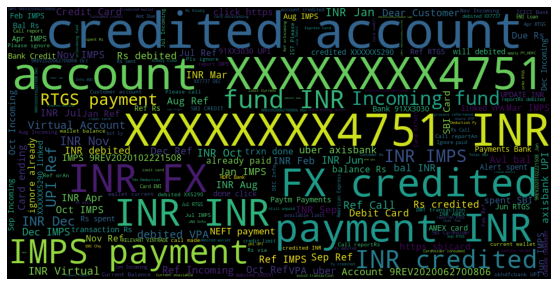

In [ ]:
# Most commonly observed words in this user's transactional texts
texts_mashed = (''.join(np.array(txn_msg_eg_user['message'])))
wordcloud = WordCloud(width = 1000, height = 500).generate(texts_mashed)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# DBSBNK= DBSBNK.sort_values(by=['timestamp'])
# DBSBNK.head()

In [ ]:
#DBSBNK['amount'].plot()